# Machine Learning Lab 2 - Statistical Inferences and Exploratory Data Analysis
Submitted By <br/>
Name: **Rathod Nishit Shailesh** <br/>
Register Number: **19112014** <br/>
Class: **5 BSc Data Science** <br/>

<hr/>

#### Lab Overview Statement
- You are appointed as a Chief Data Analyst in the Exam Office of Foriegn University. They are conducting a study by evaluating the Exam Scores of students from different countries based on some attributes. However, the board of studies believes that you, being an amazing Analyst can bring out the change by giving more insightful inferences. 
- The fundamental objective of this study is to find insightful patterns so that the lecturers can concentrate on motivating students based on the study onto their subject. However, they expect that a wondeful analysis can give more awareness on the student performance with respect to their backgrounds.

#### Objective
- Get familiar with the problem statement, Know the dataset thoroghly and Analyse the given dataset by exploring the hidden insights with beautiful visuals.

#### Problem Definition
- Understand the Dataset & Features.
- Perform Data Preprocessing Technique to Get Balanced Structured Data.
- Perform Statistical Data Analysis and Derive Valuable Inferences.
- Perform Exploratory Data Analysis and Derive Valuable Insights.

#### Approach
This is an extension to the Problem Defnintion. Mention the process/appraoch that you have followed in order to reach out the above problem defintion.

- Step 1: Know the dataset thoroughly.
- Step 2: Perform preprocessing on data.
- Step 3: Import needfull libraries as an when you try to plot different graphs.
- Step 4: Perform Statistical Data Analysis and Derive Valuable Inferences.
- Step 5: Perform Exploratory Data Analysis and Derive Valuable Insights.
- Step 6: Repeat Step 2, 3, 4, 5 every time you find interesting out of data.

#### Sections
Here, mentioned sections are defined in the below code. For this lab, the sections are -
1. Lab Overview
1. Dataset Overview
1. Data Analyst Process
1. Observation & Conclusion

#### References
1. https://pandas.pydata.org/
1. https://matplotlib.org/
1. https://seaborn.pydata.org/
1. https://plotly.com/
1. https://www.kaggle.com/spscientist/students-performance-in-exams
<hr/>

#### Dataset Overview
Analyzing student work is an essential part of teaching. Teachers assign, collect and examine student work all the time to assess student learning and to revise and improve teaching. Ongoing assessment of student learning allows teachers to engage in continuous quality improvement of their courses. Many factors can influence a student's performance, including the influence of the parents' educational background, financial assistance, test preparation, student health, and so on. "ExamResults" dataset consists of the marks secured in various subjects by the students of different countries with the external influencial factors like parents education background, financial aid and test preparation.

#### About the Features
1. Sex: Boy / Girl
1. Country: United States of America/ United kingdom/ Australia/ India/ Others
1. ParentEducation: Details of parental education varying from high school to master's degree.
1. FinancialAid: Got Fainancial Assistance or Not. 
1. TestPerparation: How well are the students prepared for the exam/test.
1. Science: Marks secured by a student in Science.
1. Language: Marks secured by a student in Language
1. Communcation: Marks secured by a student in Communcation

#### Additional Features
9. TotalMarks: Aggregate marks secured by a student.
10. Percentage: How much percentage a student got in the exam.
11. Result: Details of exam performance classified from "Distiction to Failure".

## Data Analyst Process

#### Import the required library.



In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Upload the Dataset Files onto the Google Colab.

In [2]:
from google.colab import files
uploaded = files.upload()

#### Read the Dataset.

In [3]:
df = pd.read_csv("ExamResults.csv")

#### Gain the Dataset Knowledge - Know Each Features Thorougly.


In [4]:
df.columns #Displays the column names.

Index(['Sex', 'Country', 'ParentEducation', 'FinancialAid', 'TestPreparation',
       'Science', 'Language', 'Communcation'],
      dtype='object')

In [5]:
df.shape #Displays the rows and column count

(499, 8)

In [6]:
df.head() #Displays the first 5 rows by default.

Sex Country     ParentEducation   FinancialAid TestPreparation  Science  \
0  Girl      UK   bachelor's degree  No Assistance         Minimum       75   
1  Girl     USA        some college  No Assistance        Thorough       72   
2  Girl      UK     master's degree  No Assistance         Minimum       93   
3   Boy   India  associate's degree       Assisted         Minimum       50   
4   Boy     USA        some college  No Assistance         Minimum       79   

   Language  Communcation  
0        74            75  
1        92            89  
2        97            94  
3        59            45  
4        80            76

In [7]:
df.tail() #Displays the last 5 rows by default.

Sex    Country   ParentEducation   FinancialAid TestPreparation  \
494  Girl         UK       high school  No Assistance         Minimum   
495   Boy  Australia       high school  No Assistance        Thorough   
496  Girl        USA      some college  No Assistance         Minimum   
497  Girl  Australia      some college       Assisted        Thorough   
498  Girl         UK  some high school  No Assistance         Minimum   

     Science  Language  Communcation  
494       57        66            69  
495       71        66            67  
496       57        50            53  
497       62        80            77  
498       69        71            69

#### Add Features Like - Total, Percentage, Results/Grades to Existing Dataset

In [8]:
df["TotalMarks"] = df['Science'] + df["Language"] + df["Communcation"]

In [9]:
df["Percentage"] = (df['TotalMarks'] / 300) * 100

In [10]:
def GradingSystem(Percentage):  
    if ( Percentage >= 80 ):
        return 'Distinction'
    if ( Percentage >= 60):
        return 'First Class'
    if ( Percentage >= 50):
        return 'Second Class'
    if ( Percentage >= 40):
        return 'Pass Class'
    else: 
        return 'Fail'

df['Result'] = df.apply(lambda x : GradingSystem(x['Percentage']), axis=1)

In [11]:
df.sample(7) #Displays 7 random rows from the dataset.

Sex    Country     ParentEducation   FinancialAid TestPreparation  \
66    Boy  Australia    some high school       Assisted         Minimum   
438   Boy        USA         high school  No Assistance         Minimum   
487  Girl        USA  associate's degree       Assisted         Minimum   
148  Girl  Australia   bachelor's degree  No Assistance        Thorough   
158  Girl         UK  associate's degree  No Assistance        Thorough   
432   Boy        USA         high school  No Assistance         Minimum   
258  Girl         UK        some college  No Assistance         Minimum   

     Science  Language  Communcation  TotalMarks  Percentage        Result  
66        48        39            38         125   41.666667    Pass Class  
438       73        58            52         183   61.000000   First Class  
487       63        77            75         215   71.666667   First Class  
148       71        77            82         230   76.666667   First Class  
158       64        88            88         240   80.000000   Distinction  
432       64        58            56         178   59.333333  Second Class  
258       73        77            79         229   76.333333   First Class

In [12]:
df.info() #Gives the detail information about the dataset, features, dtypes, memory in use. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              499 non-null    object 
 1   Country          499 non-null    object 
 2   ParentEducation  499 non-null    object 
 3   FinancialAid     499 non-null    object 
 4   TestPreparation  499 non-null    object 
 5   Science          499 non-null    int64  
 6   Language         499 non-null    int64  
 7   Communcation     499 non-null    int64  
 8   TotalMarks       499 non-null    int64  
 9   Percentage       499 non-null    float64
 10  Result           499 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 43.0+ KB


In [13]:
df.describe() #Displays the 5 parameter statistical summary [Count, Mean, Standard Deviation, Minimum value, Quartiles, Maximum value] for columns with numerical data.

Science    Language  Communcation  TotalMarks  Percentage
count  499.000000  499.000000    499.000000  499.000000  499.000000
mean    68.655311   70.434870     68.234469  207.324649   69.108216
std     14.966275   14.664291     15.187950   42.687889   14.229296
min      3.000000   19.000000     11.000000   33.000000   11.000000
25%     60.000000   60.000000     58.000000  180.000000   60.000000
50%     69.000000   71.000000     69.000000  210.000000   70.000000
75%     79.000000   81.000000     79.000000  238.000000   79.333333
max    100.000000   99.000000     99.000000  297.000000   99.000000

### Statistical Inferences & Data Analysis

#### Exploring Missing Values Present In Dataset.

In [14]:
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['Variables','Missing values in percentage']

fig = px.imshow(df.isnull().T, template = 'ggplot2')
fig.update_layout(title = 'Missing Values In Dataset')
fig.show()

- The above frequency map for mising value draws the clear conclusion that there is no missing data present in the dataset. The dataset is structured completly.

In [15]:
print("Missing Values\n\n",df.isnull().sum())

Missing Values

 Sex                0
Country            0
ParentEducation    0
FinancialAid       0
TestPreparation    0
Science            0
Language           0
Communcation       0
TotalMarks         0
Percentage         0
Result             0
dtype: int64


#### Getting to Know the % Distribution of Each Feature.

In [16]:
def percentage(df):
    number = pd.DataFrame(df.value_counts())
    number.columns = ['Total']
    number['%'] = round((number['Total'] / df.notnull().sum()) * 100, 1)
    return number

##### Sex

In [17]:
percentage(df["Sex"])

Total     %
Boy     253  50.7
Girl    246  49.3

In [18]:
Pie = df['Sex'].value_counts().reset_index()
Pie.columns = ['Sex','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Sex', values = 'Percent', title = 'Sex', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- The above pie chart tells about the allocation of data for feature "Sex".
  - 50.7% of the entire dataset is distributed under Male.
  - 49.3% of the entire dataset is distributed under Female.

##### Country

In [19]:
percentage(df["Country"])

Total     %
USA          166  33.3
Australia    127  25.5
UK            99  19.8
Others        64  12.8
India         43   8.6

In [20]:
Pie = df['Country'].value_counts().reset_index()
Pie.columns = ['Country','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Country', values = 'Percent', title = 'Country', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- The above pie chart tells about the allocation of data for feature "Country".
  - 33.3% of the entire dataset is distributed under USA.
  - 25.5% of the entire dataset is distributed under Australia.
  - 19.8% of the entire dataset is distributed under UK.
  - 8.62% of the entire dataset is distributed under India.
  - 12.8% of the entire dataset is distributed under Others.

##### ParentEducation

In [21]:
percentage(df["ParentEducation"])

Total     %
associate's degree    120  24.0
some college          115  23.0
some high school       91  18.2
high school            88  17.6
bachelor's degree      58  11.6
master's degree        27   5.4

In [22]:
Pie = df['ParentEducation'].value_counts().reset_index()
Pie.columns = ['ParentEducation','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'ParentEducation', values = 'Percent', title = 'ParentEducation', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- The above pie chart tells about the allocation of data for feature "ParentEducation".
  - 24% of the parents have Associate's degree.
  - 23% of the parents have done their education till College.
  - 35.8% of the parents have done their education till High school.
  - 11.6% of the parents have Bachelor's degree.
  - 5.41% of the parents have Master's Degree.

##### FinancialAid

In [23]:
percentage(df["FinancialAid"])

Total     %
No Assistance    327  65.5
Assisted         172  34.5

In [24]:
Pie = df['FinancialAid'].value_counts().reset_index()
Pie.columns = ['FinancialAid','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'FinancialAid', values = 'Percent', title = 'FinancialAid', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- The above pie chart tells about the allocation of data for feature "FinancialAid".
  - 65.5% of the entire dataset hasn't opted for financial assistance.
  - 34.5% of the entire dataset has opted for financial assistance.

##### TestPreparation

In [25]:
percentage(df["TestPreparation"])

Total     %
Minimum     328  65.7
Thorough    171  34.3

In [26]:
Pie = df['TestPreparation'].value_counts().reset_index()
Pie.columns = ['TestPreparation','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'TestPreparation', values = 'Percent', title = 'TestPreparation', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- The above pie chart tells about the allocation of data for feature "TestPreparation".
  - 65.7% student's of the entire dataset has prepared minimal for their exam.
  - 34.3% student's of the entire dataset have thoroughly prepared for their exam.

##### Result

In [27]:
percentage(df["Result"])

Total     %
First Class     253  50.7
Distinction     122  24.4
Second Class     80  16.0
Pass Class       33   6.6
Fail             11   2.2

In [28]:
Pie = df['Result'].value_counts().reset_index()
Pie.columns = ['Result','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Result', values = 'Percent', title = 'Result', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

- The above pie chart tells about the allocation of data for feature "Result".
  - 50.7% student's of the entire dataset have secured First Class in their exam.
  - 24.4% student's of the entire dataset have secured Distinction in their exam.
  - 16% student's of the entire dataset have secured Second Class in their exam.
  - 6.61% student's of the entire dataset have secured Pass Class in their exam.
  - 2.2% student's of the entire dataset have Failed in their exam.


##### Science

###### Kernel Distribution Estimation Plot For Science Score.

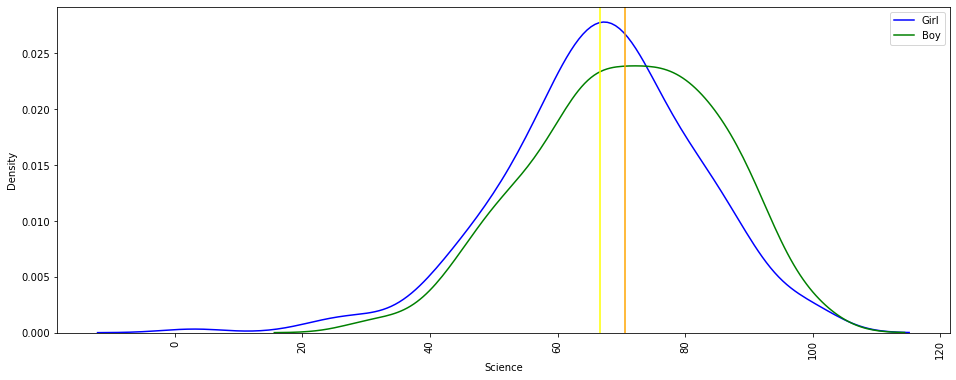

In [29]:
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(df[df['Sex'] == 'Girl']['Science'], color = 'Blue', ax = ax, label = 'Girl')
sns.kdeplot(df[df['Sex'] == 'Boy']['Science'], color = 'Green', ax = ax, label = 'Boy')

plt.axvline(df[df['Sex'] == 'Girl']['Science'].mean(), color = 'Yellow')
plt.axvline(df[df['Sex'] == 'Boy']['Science'].mean(), color = 'Orange')

plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

The above graph inferences about: 
- Boys majorly have scored well enought in science comapared to girls.
- Girls have the highest count on failure in science compared to boys.
- Boys holds the highest average in science compared to girls.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature.
- There are some outliers where marks of science is exceeding 100.

###### Histogram For Science Score w.r.t Sex

In [30]:
fig = px.histogram(df, x = "Science", y = "Science", color_discrete_sequence = px.colors.sequential.RdBu, color = "Sex")
fig.show()

The above histogram inferences about: 
- Boys majorly have scored well enought in science comapared to girls.
- Major students have score ranging between 60 - 74 in science.
- Girls have the highest count on failure in science compared to boys.
- Boys holds the highest average in science compared to girls.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature.
- There are no outliers.

###### Barplot Between ParentEducation and Science Score w.r.t Sex. 

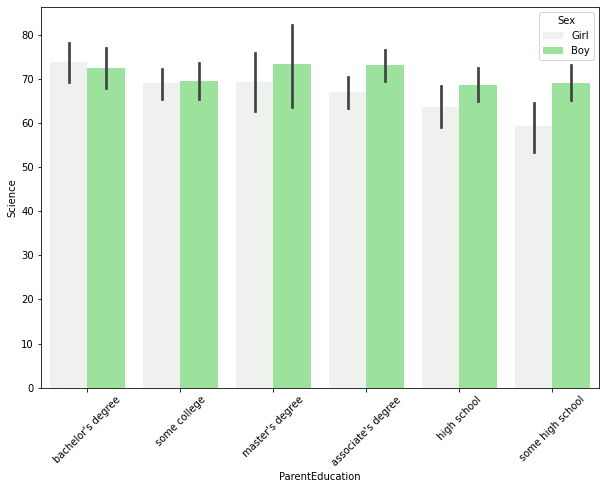

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x = "ParentEducation", y = "Science", hue = "Sex", data = df, color = "lightgreen")
plt.xticks(rotation=45)
plt.show()

The above barplot inferences about:
- The parents with Master's degree affect great on childs's science score followed my Bachelors degree and Associates degree esspecially in boys. 
- The parents having education only limiting to high school or college has not that great impact on their child's science score. 

###### Boxplot for Science Score w.r.t Sex. 

In [32]:
px.box(data_frame = df, x = 'Sex',y = 'Science', color_discrete_sequence = px.colors.sequential.RdBu)

The above boxplot summarizes that the average of boys is highest with 71% in science exam with comapred to girls with 65% adding to this there are more girls who failed in exam compared to boys.

###### JointPlot [Scaterplot and Histplot] for knowing the relation between Percentage and Science Score w.r.t TestPreparation. 

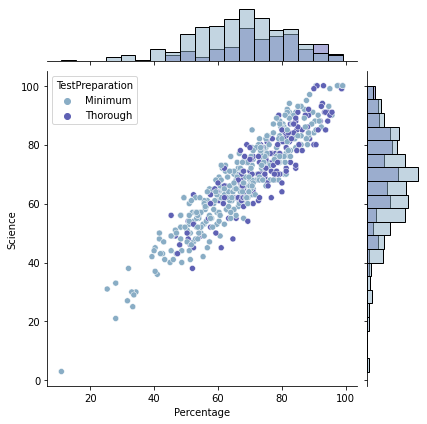

In [33]:
sns.set_palette("twilight")
g = sns.JointGrid(data=df, x="Percentage", y="Science", hue = "TestPreparation")
g.plot(sns.scatterplot, sns.histplot)
plt.show()

From the above visualization we can infer that :
- Students who have completed their test preparations have definitely scored better.
- While a few students who did not complete their test preparations have not performed so well.
- We can notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.
- Also, there are very few who completed their test preparation but still scored low percentage.

###### JointPlot [Scaterplot and Histplot] for knowing the relation between Percentage and Science Score w.r.t FinancialAid. 

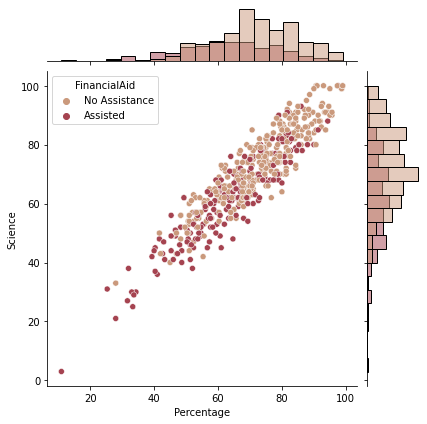

In [34]:
sns.set_palette("twilight_r")
g = sns.JointGrid(data=df, x="Percentage", y="Science", hue = "FinancialAid")
g.plot(sns.scatterplot, sns.histplot)
plt.show()

From the above graph:
- Students who have taken the financial assitance in order to get the quality education tends towards low science score, which says that students do feel presure of performing well in the exam as they are financially inefficient and handling more task in life with "have to perform well no matter what" mindset, but this is not the case with the students who are financially well. They are performing well in the exam with no external pressure. 
- There are very few students who has taken the aid but are performing good in exams.

##### Language

###### Kernel Distribution Estimation Plot For Scores of Language.

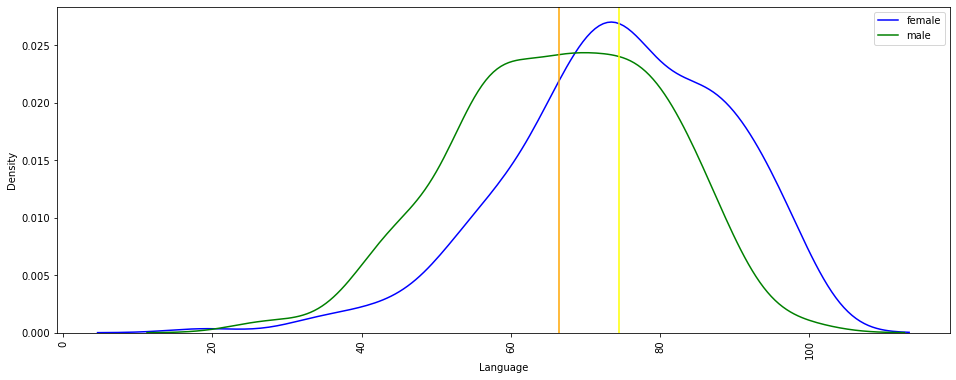

In [35]:
fig, ax = plt.subplots(1,1,figsize = (16, 6))
sns.kdeplot(df[df['Sex'] == 'Girl']['Language'], color = 'Blue', ax = ax, label = 'female')
sns.kdeplot(df[df['Sex'] == 'Boy']['Language'], color = 'Green', ax = ax, label = 'male')

plt.axvline(df[df['Sex'] == 'Girl']['Language'].mean(), color = 'Yellow')
plt.axvline(df[df['Sex'] == 'Boy']['Language'].mean(), color = 'Orange')

plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

The above graph inferences about: 
- Girls majorly have scored well enought in Language comapared to boys.
- Girls have the highest count on failure in Language compared to boys.
- Girls holds the highest average in Language compared to Boyss.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature.
- There are no outliers present.

###### Histogram For Language Score w.r.t Sex 

In [36]:
fig = px.histogram(df, x = "Language", y = "Language", color_discrete_sequence = px.colors.sequential.RdBu, color = "Sex")
fig.show()

The above histogram inferences about: 
- Girls majorly have scored well enought in Language comapared to boys.
- Major students have got marks between 65 - 79 in Language.
- Girls have the highest count on failure in Language compared to boys.
- Girls holds the highest average in Language compared to Boyss.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature.
- There are no outliers present.

###### Barplot Between ParentEducation and Language Score w.r.t Sex. 

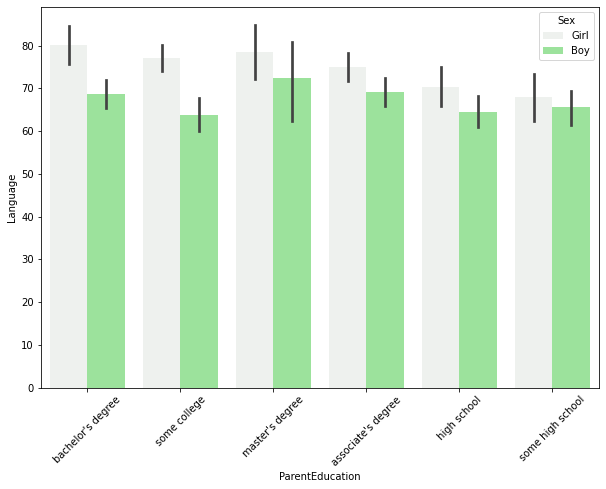

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x = "ParentEducation", y = "Language", hue = "Sex", data = df, color = "lightgreen")
plt.xticks(rotation=45)
plt.show()

The above barplot inferences about:
- The parents with Master's degree affect great on childs's languages score followed my Bachelors degree and Associates degree especially to girls. 
- The parents having education only limiting to high school or college has not that great impact on their child's language score.

###### Boxplot for Language Score w.r.t Sex.

In [38]:
px.box(data_frame = df, x = 'Sex',y = 'Language', color_discrete_sequence = px.colors.sequential.RdBu)

The above boxplot summarizes that the average of girls is highest with 75% in Language exam with comapred to boys with 68% but there are more girls who failed in exam compared to boys.

###### JointPlot [Scaterplot and Histplot] for knowing the relation between Percentage and Language Score w.r.t TestPreparation.

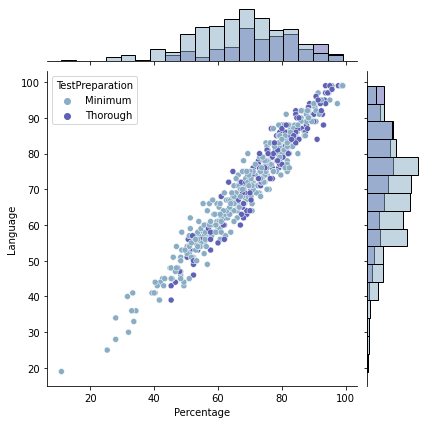

In [39]:
sns.set_palette("twilight")
g = sns.JointGrid(data=df, x="Percentage", y="Language", hue = "TestPreparation")
g.plot(sns.scatterplot, sns.histplot)
plt.show()

From the above visualization we can infer that :
- Students who have completed their test preparations have definitely scored better.
- While a few students who did not complete their test preparations have not performed so well.
- We can notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.
- Also, there are very few who completed their test preparation but still scored low percentage.

###### JointPlot [Scaterplot and Histplot] for knowing the relation between Percentage and Language Score w.r.t Financial Aid. 

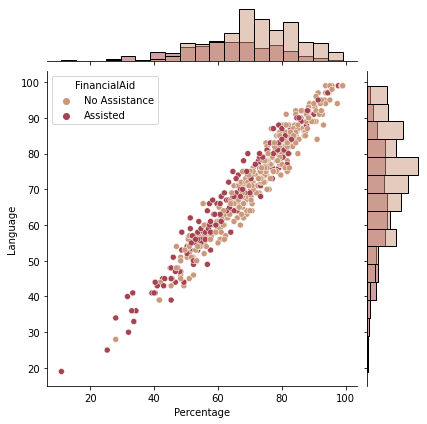

In [40]:
sns.set_palette("twilight_r")
g = sns.JointGrid(data=df, x="Percentage", y="Language", hue = "FinancialAid")
g.plot(sns.scatterplot, sns.histplot)
plt.show()

From the above graph:
- Students who have taken the financial assitance in order to get the quality education tends towards low language score, which says that students do feel presure of performing well in the exam as they are financially inefficient and handling more task in life with "have to perform well no matter what" mindset, but this is not the case with the students who are financially well. They are performing well in the exam with no external pressure. 
- There are very few students who has taken the aid but are performing good in exams.

##### Communication

###### Kernel Distribution Estimation Plot For Scores of Communcation.

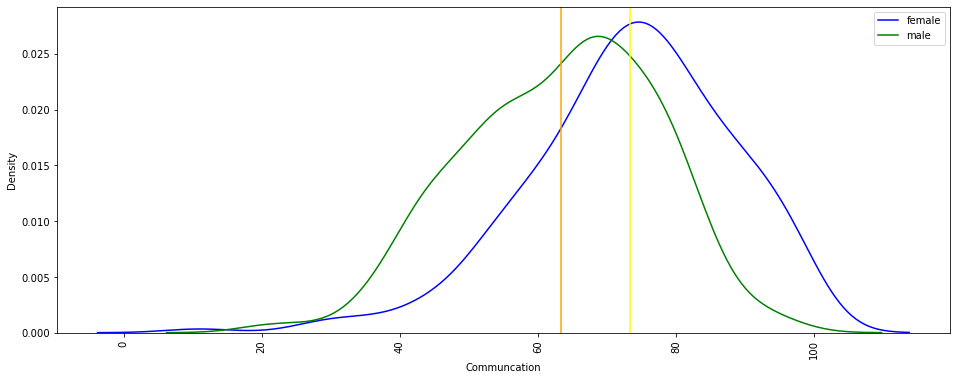

In [41]:
fig, ax = plt.subplots(1,1,figsize = (16, 6))
sns.kdeplot(df[df['Sex'] == 'Girl']['Communcation'], color = 'Blue', ax = ax, label = 'female')
sns.kdeplot(df[df['Sex'] == 'Boy']['Communcation'], color = 'Green', ax = ax, label = 'male')

plt.axvline(df[df['Sex'] == 'Girl']['Communcation'].mean(), color = 'Yellow')
plt.axvline(df[df['Sex'] == 'Boy']['Communcation'].mean(), color = 'Orange')

plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

The above graph inferences about: 
- Girls majorly have scored well enought in Communication comapared to boys.
- Girls have the highest count on failure in Communication compared to boys.
- Girls holds the highest average in Communication compared to boys.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature. 
- There are no outliers present.

###### Histogram For Communication Score w.r.t Sex 

In [42]:
fig = px.histogram(df, x = "Communcation", y = "Communcation", color_discrete_sequence = px.colors.sequential.RdBu, color = "Sex")
fig.show()

The above histogram inferences about: 
- Girls majorly have scored well enought in Communication comapared to boys.
- Major students have got marks between 65 - 79 in communication.
- Girls have the highest count on failure in Communication compared to boys.
- Girls holds the highest average in Communication compared to boys.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature. 
- There are no outliers present.

###### Barplot Between ParentEducation and Communcation Score w.r.t Sex. 

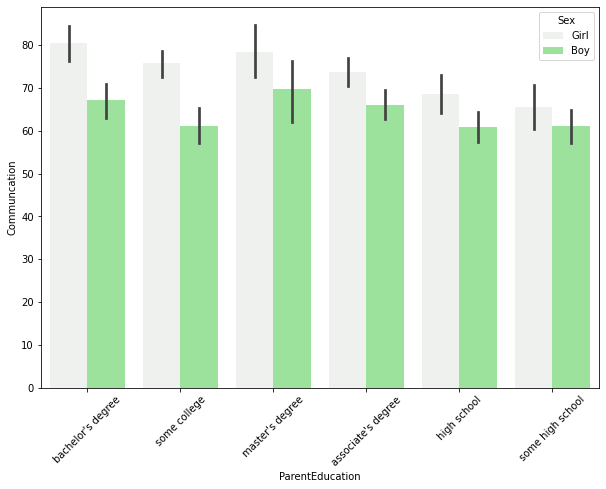

In [43]:
plt.figure(figsize=(10,7))
sns.barplot(x = "ParentEducation", y = "Communcation", hue = "Sex", data = df, color = "lightgreen")
plt.xticks(rotation=45)
plt.show()

The above barplot inferences about:
- The parents with Master's degree affect great on childs's communication score followed my Bachelors degree and Associates degree especially to girls. 
- The parents having education only limiting to high school or college has not that great impact on their child's communication score.

###### Boxplot for Communcation Score w.r.t Sex.

In [44]:
px.box(data_frame = df, x = 'Sex',y = 'Communcation', color_discrete_sequence = px.colors.sequential.RdBu)

The above boxplot summarizes that the average of girls is highest with 75% in communcation exam with comapred to boys with 65% but there are more girls who failed in exam compared to boys.

###### JointPlot [Scaterplot and Histplot] for knowing the relation between Percentage and Communcation Score w.r.t TestPreparation. 

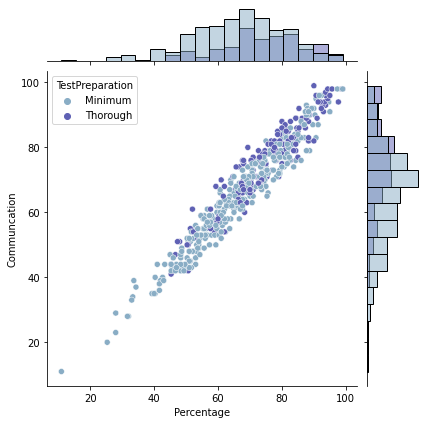

In [45]:
sns.set_palette("twilight")
g = sns.JointGrid(data=df, x="Percentage", y="Communcation", hue = "TestPreparation")
g.plot(sns.scatterplot, sns.histplot)
plt.show()

From the above visualization we can infer that :
- Students who have completed their test preparations have definitely scored better.
- While a few students who did not complete their test preparations have not performed so well.
- We can notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.
- Also, there are very few who completed their test preparation but still scored low percentage.

###### JointPlot [Scaterplot and Histplot] for knowing the relation between Percentage and Communcation Score w.r.t TestPreparation. 

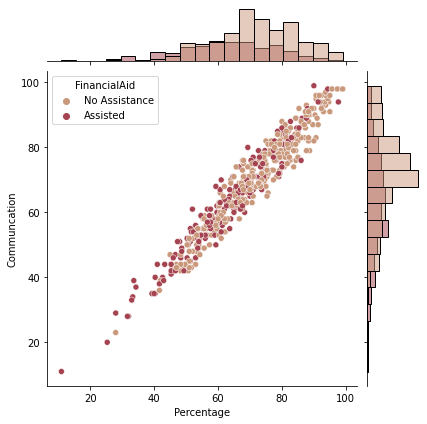

In [46]:
sns.set_palette("twilight_r")
g = sns.JointGrid(data=df, x="Percentage", y="Communcation", hue = "FinancialAid")
g.plot(sns.scatterplot, sns.histplot)
plt.show()

From the above graph:
- Students who have taken the financial assitance in order to get the quality education tends towards low Communcation score, which says that students do feel presure of performing well in the exam as they are financially inefficient and handling more task in life with "have to perform well no matter what" mindset, but this is not the case with the students who are financially well. They are performing well in the exam with no external pressure. 
- There are very few students who has taken the aid but are performing good in exams.

##### Percentage

###### Kernel Distribution Estimation Plot For Percentage Score.

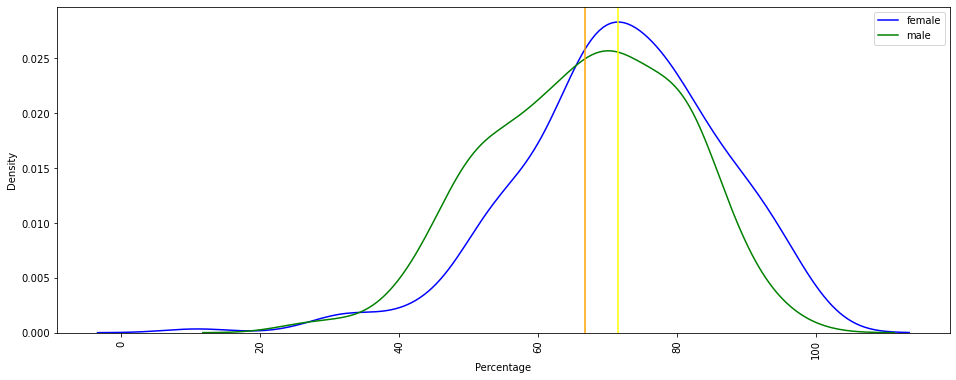

In [47]:
fig, ax = plt.subplots(1,1,figsize = (16, 6))
sns.kdeplot(df[df['Sex'] == 'Girl']['Percentage'], color = 'Blue', ax = ax, label = 'female')
sns.kdeplot(df[df['Sex'] == 'Boy']['Percentage'], color = 'Green', ax = ax, label = 'male')

plt.axvline(df[df['Sex'] == 'Girl']['Percentage'].mean(), color = 'Yellow')
plt.axvline(df[df['Sex'] == 'Boy']['Percentage'].mean(), color = 'Orange')

plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

The above graph inferences about: 
- Girls majorly have scored well enought in exam comapared to boys.
- Girls have the highest count on failure in exam compared to boys.
- Girls holds the highest average in exam compared to boys.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature. 
- There are no outliers present.

###### Histogram For Percentage w.r.t Sex 

In [48]:
fig = px.histogram(df, x = "Percentage", y = "Percentage", color_discrete_sequence = px.colors.sequential.RdBu, color = "Sex")
fig.show()

The above histogram inferences about: 
- Girls majorly have scored well enought in exam comapared to boys.
- Major students have got result between 65 - 85 % in the entire exam.
- Girls have the highest count on failure in exam compared to boys.
- Girls holds the highest average in exam compared to boys.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature.
- There is more count of girls above 65% and less count below 65% - which signifies that when girls are prepared they tend to score more compared to boys as boys seems to be satisfactory with their result. 
- There are no outliers present.

###### Vioplot Between ParentEducation and Percentage w.r.t Sex. 

<Figure size 1584x864 with 0 Axes>

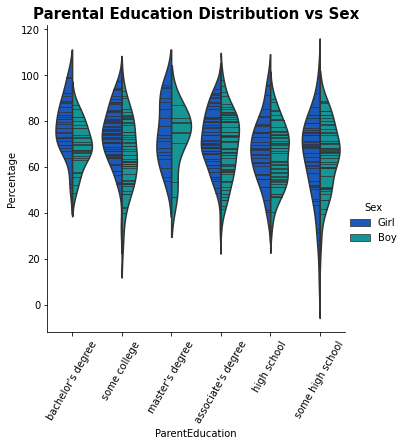

In [49]:
plt.figure(figsize=(22,12))
sns.catplot(x = "ParentEducation", y = "Percentage", hue = "Sex",
            kind = "violin", inner = "stick", split = True,
            palette = "winter", data = df)
plt.title('Parental Education Distribution vs Sex',fontsize=15, fontweight='bold')
plt.xticks(rotation = 60)
plt.show()

From the above violin plot: 
- Girl's whose parents hold a Bachelor's degree, followed by master's degree, are more successful in terms of academic.
- Boy's whose parents hold a Bachelor's degree and master's degree have similar academic performance.

###### Boxplot for Percentage w.r.t Sex and Country.

In [50]:
px.box(data_frame = df, x = 'Sex',y = 'Percentage', color_discrete_sequence = px.colors.sequential.RdBu)

The above boxplot summarizes that the average of girls is highest with 72.16% in exam with comapred to boys with 67.67% but there are more girls who failed in exam compared to boys.

In [51]:
px.box(data_frame = df, x = 'Country',y = 'Percentage', color_discrete_sequence = px.colors.sequential.RdBu)

The above boxplot summarizes that the average of "Others" is highest among all the countries while the average of India is the lowest.

###### Kernal Distribution Estimation Plot of Percentage w.r.t Parent's Education.  

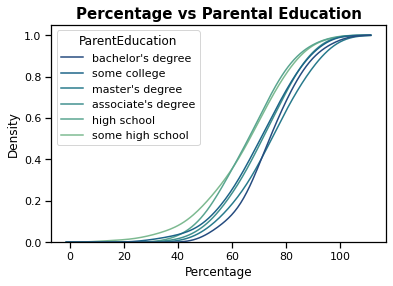

In [52]:
sns.set_palette("crest_r")
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data = df, x = "Percentage", hue = "ParentEducation",
    cumulative = True, common_norm = False, common_grid=True,
)
plt.title('Percentage vs Parental Education', fontsize=15, fontweight='bold')
plt.show()

From the above diagram:
- Students whose parents hold a master's degree have a higher overall percentage. 
- Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.



###### Kernel Distribution Estimation Plot Between Percentage and TestPreparation.

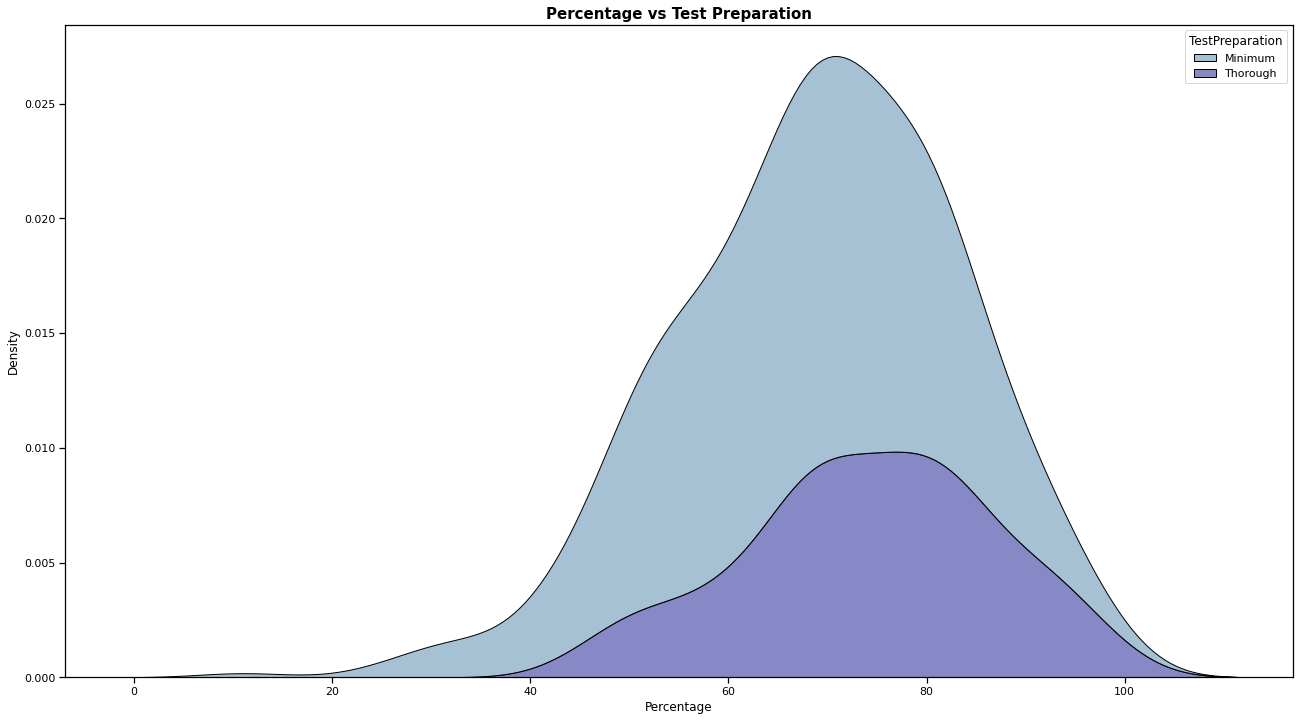

In [53]:
plt.figure(figsize=(22,12))
sns.set_palette("twilight")
sns.kdeplot(data = df, x = "Percentage", hue = "TestPreparation", multiple = "stack")
plt.title('Percentage vs Test Preparation', fontsize = 15, fontweight = 'bold')

plt.show()

From the above graph:
- Students who havent studies thoroughly for their exams lends towards low percentage, but this is not the case with the students who have studied thoroughly.
- Hardwork always pay off. With Hardwork comes Luck. 

###### Kernel Distribution Estimation Plot Between Percentage and Financial Aid.

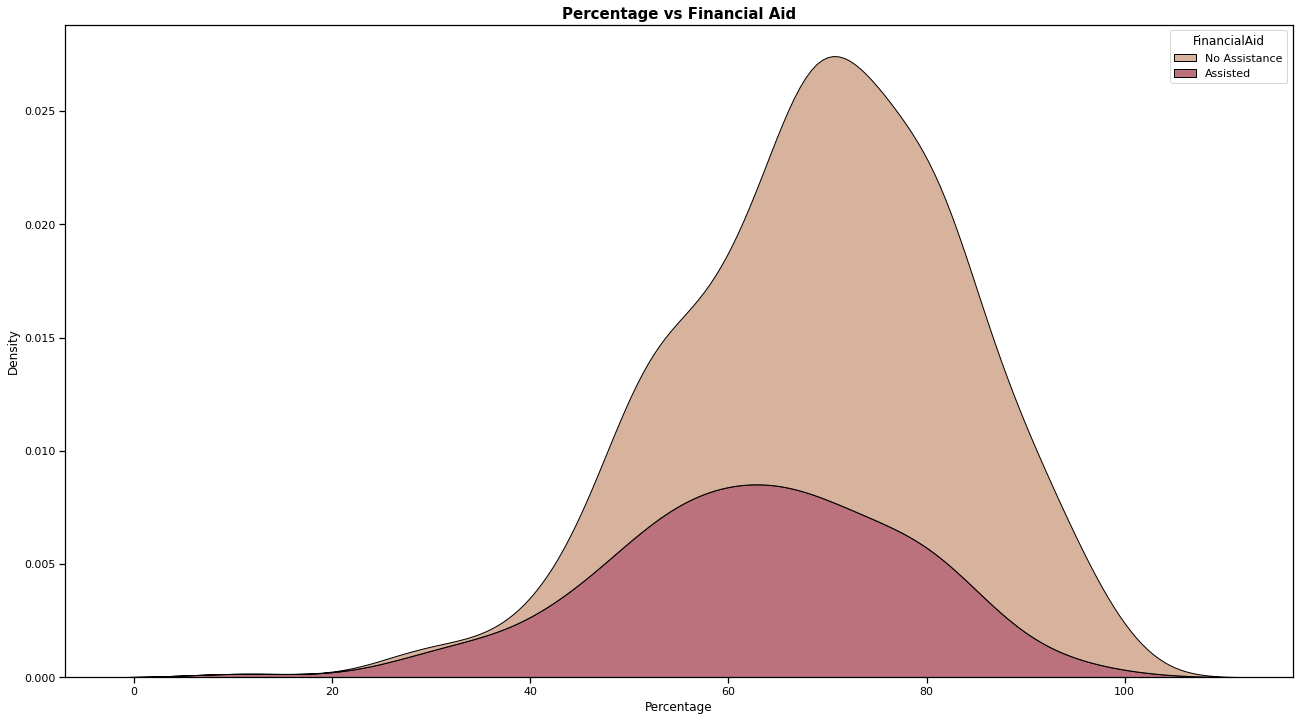

In [54]:
plt.figure(figsize=(22,12))
sns.set_palette("twilight_r")
sns.kdeplot(data = df, x = "Percentage", hue = "FinancialAid", multiple = "stack")
plt.title('Percentage vs Financial Aid', fontsize = 15, fontweight = 'bold')

plt.show()

From the above graph:
- Students who have taken the financial assitance in order to get the quality education tends towards low percentage, which says that students do feel presure of performing well in the exam as they are getting aid and studing and have to perform well no matter what, but this is not the case with the students who are financially well.

Kernel Distribution Estimation Plot for Percentage w.r.t Country.

<Figure size 1584x864 with 0 Axes>

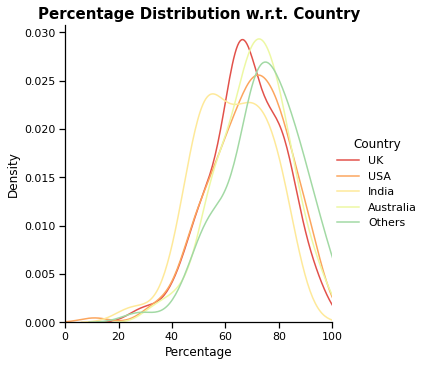

In [55]:
plt.figure(figsize=(22,12))
sns.set_palette("Spectral")
(sns.FacetGrid(df, hue = "Country", height = 5, xlim = (0,100)).map(sns.kdeplot, "Percentage").add_legend())
plt.title('Percentage Distribution w.r.t. Country',fontsize=15, fontweight='bold')
plt.show()

The above plot summarizes that the performance of students from "Other Countries" is best among all. While USA and Australia have nearly similar performance. Indian Education need to be improved to get onto the top of the list but again factors like economy, poverty, health and hygyiene, population etc. factors come into the picture which directly or indirectly affects the education.

##### Other

###### Clustered Bargraph of Average Subject Marks w.r.t Parental Education.

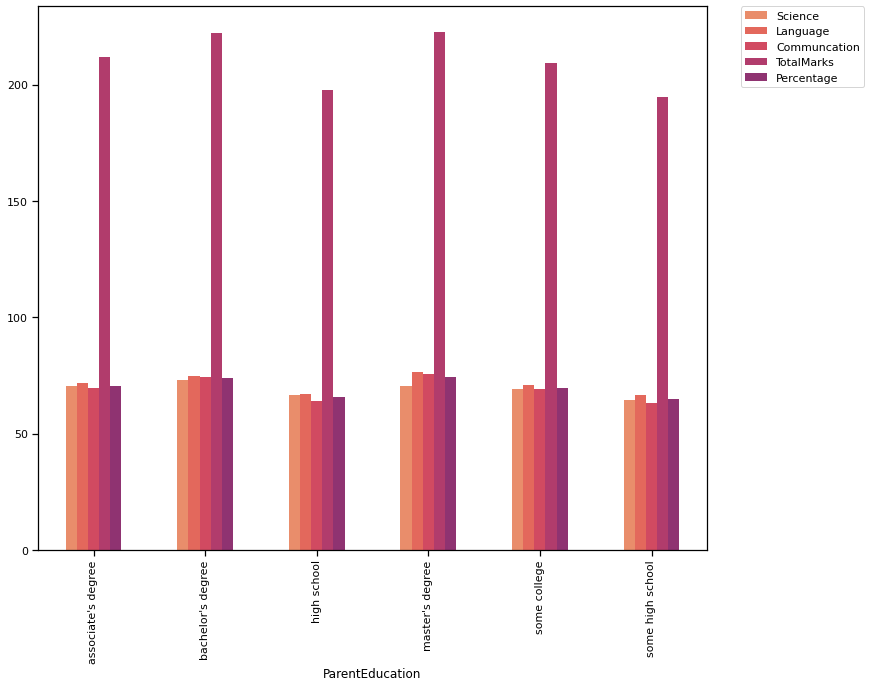

In [56]:
sns.set_palette("flare")
df.groupby('ParentEducation').agg('mean').plot(kind='bar',figsize = (12,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

The above clustered barplot inferences about:
- The parents with Master's degree affect great on childs's score followed my Bachelors degree and Associates degree. 
- The parents having education only limiting to high school or college has not that great impact on their child's score.

###### Clustered Bargraph of Average Subject Marks w.r.t Country.

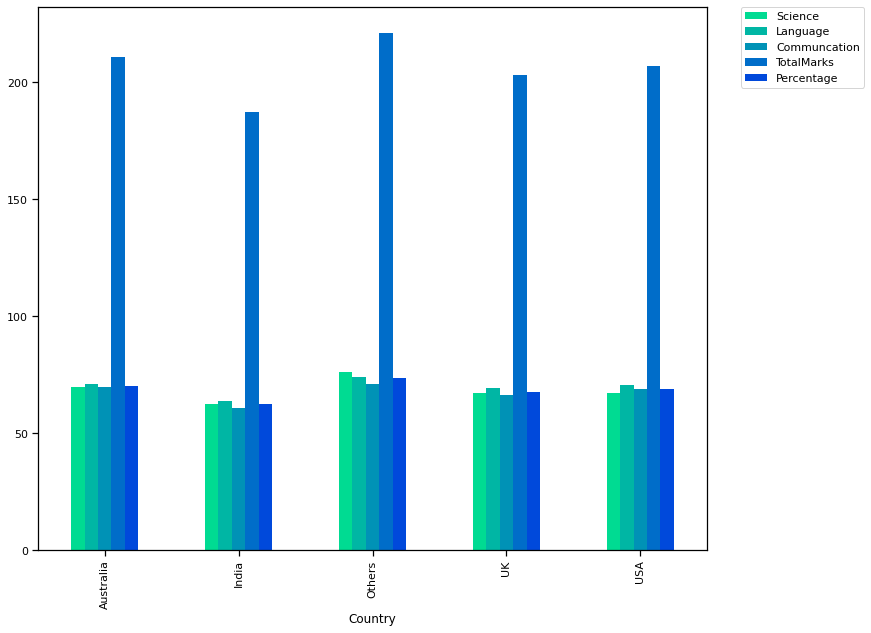

In [57]:
sns.set_palette("winter_r")
df.groupby('Country').agg('mean').plot(kind='bar',figsize = (12,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

The above cluster barplot summarizes that the performance of students from "Other Countries" is best among all. While USA UK and Australia have nearly similar performance. Indian Education need to be improved to get onto the top of the list but again factors like economy, poverty, health and hygyiene, population etc. come into the picture which directly or indirectly affects the education.

###### Pie Chart for Overall Mean Subject Score.

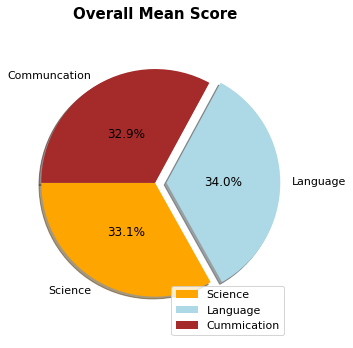

In [58]:
plt.figure(figsize=(5,5))
labels=['Science', 'Language', 'Communcation']
colors=['Orange','Lightblue','Brown']
explode=[0,0.1,0]
values=[df["Science"].mean(),df["Language"].mean(),df["Communcation"].mean()]

plt.pie(values, labels = labels,colors = colors,explode=explode, autopct = '%1.1f%%', shadow=True, startangle = 180, pctdistance = 0.5)
plt.legend(['Science', 'Language', 'Cummication'], loc = 'lower right')
plt.axis('equal')
plt.title('Overall Mean Score  ', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

The above pie summarize that the Language Scores has the highest average. Which also tells that checking in language paper might be linient or the professor was more clear about his/her teaching which made students learn effectively.

#### Getting to know the Correlation among the Features.

In [59]:
df.corr()

Science  Language  Communcation  TotalMarks  Percentage
Science       1.000000  0.824008      0.806071    0.920456    0.920456
Language      0.824008  1.000000      0.952786    0.971411    0.971411
Communcation  0.806071  0.952786      1.000000    0.965702    0.965702
TotalMarks    0.920456  0.971411      0.965702    1.000000    1.000000
Percentage    0.920456  0.971411      0.965702    1.000000    1.000000

##### Heatmap Showing the Correlation Between the Features.

Text(0.5, 1.0, 'Correlation between features')

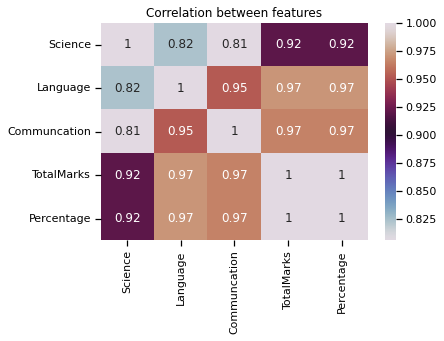

In [60]:
sns.heatmap(df.corr(), annot = True, cmap = "twilight").set_title("Correlation between features")

##### Scatterplot Between Science - Language, Language - Communication, Communcation - Science.

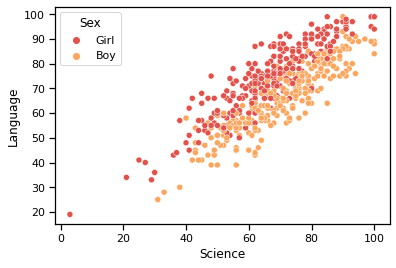

In [61]:
sns.set_palette("Spectral")
sns.scatterplot(x="Science", y = "Language", hue = "Sex", data = df)
plt.show()

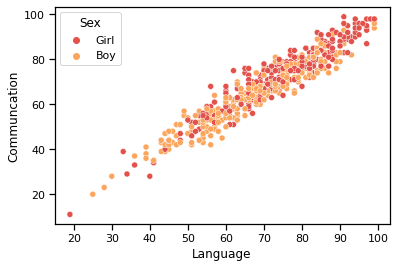

In [62]:
sns.set_palette("Spectral")
sns.scatterplot(x="Language", y = "Communcation", hue = "Sex", data = df)
plt.show()

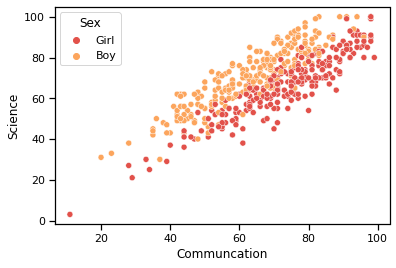

In [63]:
sns.set_palette("Spectral")
sns.scatterplot(x="Communcation", y = "Science", hue = "Sex", data = df)
plt.show()

##### Pairplot Showing Multiple Pairwise Bivariate Distributions Among Features w.r.t Sex

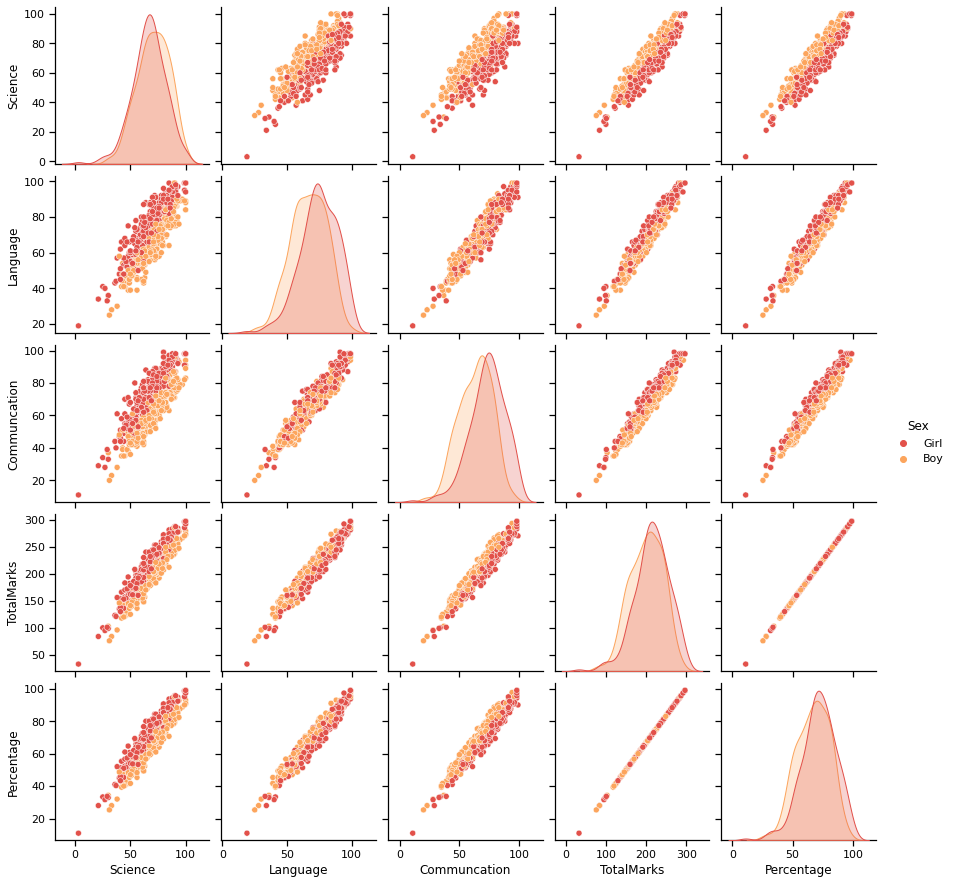

In [64]:
sns.set_palette("Spectral")
sns.pairplot(df, hue = 'Sex')

The above heat map, scatterplot, and pairplot signifies the relationships between feature. 
- It is seen that there is a positive correlation among all variable. 
- "TotalMarks and Percentage" has powerful positive correlation between science, language and communation.
- There is also a powerful positive correlation between "language" and "communication", which signifies that the one who is good in language must be good in communicating.
- There is not that type of correlation which "Language and Communcation" has in between when compared to science. This signifies that science is purely of practical knowledge, language or communication doesnot affect the score in science to greater extent.

In [65]:
Data = df.copy() #Copying the records of dataframe to new dataframe.

In [66]:
Data.head(5)

Sex Country     ParentEducation   FinancialAid TestPreparation  Science  \
0  Girl      UK   bachelor's degree  No Assistance         Minimum       75   
1  Girl     USA        some college  No Assistance        Thorough       72   
2  Girl      UK     master's degree  No Assistance         Minimum       93   
3   Boy   India  associate's degree       Assisted         Minimum       50   
4   Boy     USA        some college  No Assistance         Minimum       79   

   Language  Communcation  TotalMarks  Percentage        Result  
0        74            75         224   74.666667   First Class  
1        92            89         253   84.333333   Distinction  
2        97            94         284   94.666667   Distinction  
3        59            45         154   51.333333  Second Class  
4        80            76         235   78.333333   First Class

#### Top 10 Students who flourished marvelously in exam.

In [67]:
Data.sort_values(by="Percentage", ascending = False).head(10)

Sex    Country     ParentEducation   FinancialAid TestPreparation  \
458  Girl     Others   bachelor's degree  No Assistance         Minimum   
179  Girl  Australia    some high school  No Assistance        Thorough   
165  Girl        USA   bachelor's degree  No Assistance        Thorough   
114  Girl     Others   bachelor's degree  No Assistance        Thorough   
149   Boy     Others  associate's degree       Assisted        Thorough   
451  Girl     Others        some college  No Assistance         Minimum   
403  Girl  Australia         high school  No Assistance        Thorough   
106  Girl  Australia     master's degree  No Assistance         Minimum   
381   Boy        USA  associate's degree  No Assistance        Thorough   
263  Girl     Others         high school  No Assistance         Minimum   

     Science  Language  Communcation  TotalMarks  Percentage       Result  
458      100        99            98         297   99.000000  Distinction  
179      100        99            98         297   99.000000  Distinction  
165       99        99            98         296   98.666667  Distinction  
114       99        99            98         296   98.666667  Distinction  
149      100        99            94         293   97.666667  Distinction  
451      100        94            98         292   97.333333  Distinction  
403       91        98            98         287   95.666667  Distinction  
106       90        99            98         287   95.666667  Distinction  
381       90        99            96         285   95.000000  Distinction  
263       99        95            91         285   95.000000  Distinction

- From the above table we came to know that the top 10 students who have performed extremly well in exams are majority girls from either USA Australia and Other countries.
- Majority of the students parent hold either a Master's degree, Bachelor's Degree or Associates Degree, but there is exception to this case also.
- Majority of the students haven't took financial aid for the quality education resulted into great score with less pressure onto there head. 
- Majority of the students have thoroughly prepared for the exam which resulted into great score, but there are genius students who prove this point wrong.  

#### Top 10 Students who haven't flourished marvelously in exam.

In [68]:
Data.sort_values(by="Percentage", ascending = True).head(11)

Sex    Country     ParentEducation   FinancialAid TestPreparation  \
59   Girl        USA    some high school       Assisted         Minimum   
327   Boy      India        some college       Assisted         Minimum   
17   Girl         UK    some high school       Assisted         Minimum   
76    Boy     Others    some high school  No Assistance         Minimum   
338  Girl         UK    some high school       Assisted         Minimum   
211   Boy        USA        some college       Assisted         Minimum   
363  Girl  Australia    some high school       Assisted         Minimum   
145  Girl        USA        some college       Assisted         Minimum   
466  Girl  Australia  associate's degree       Assisted         Minimum   
91    Boy        USA         high school       Assisted         Minimum   
61    Boy      India    some high school       Assisted         Minimum   

     Science  Language  Communcation  TotalMarks  Percentage Result  
59         3        19            11          33   11.000000   Fail  
327       31        25            20          76   25.333333   Fail  
17        21        34            29          84   28.000000   Fail  
76        33        28            23          84   28.000000   Fail  
338       27        40            28          95   31.666667   Fail  
211       38        30            28          96   32.000000   Fail  
363       30        36            33          99   33.000000   Fail  
145       25        41            34         100   33.333333   Fail  
466       29        33            39         101   33.666667   Fail  
91        30        36            37         103   34.333333   Fail  
61        42        41            35         118   39.333333   Fail

- From the above table we came to know that the top 11 students who haven't performed well in exams are evenly girls as well as boys from either USA UK Australia and India.
- Majority of the students parent have education upto High School and Colledge which is also hieriditary factor play the role in childs's poor score.
- Majority of the students have took financial aid for the quality education resulted into poor score with more pressure onto there head to perform well in the exam.
- All the students haven't thoroughly prepared for the exam which resulted into poor score.  

## Conclusion and Observation

In this lab, we have tried to gain the knowledge about data and its variables, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable insights which can help the professors to upgrade their teaching styles and enhance the subject performance for the betterment towards the students academic carrer. It can also help any education organization to bring valuable change in the system where students gets the higher quality education with improved results onto the syllabus as well as onto the students life.  

Based on the observations listed, below are the key insights that can be looked forward by the educational organization as well as professors to improve the student performance and the education system.

**Distribution Details** 

**Sex**
- 50.7% of the entire dataset is distributed under Male.
- 49.3% of the entire dataset is distributed under Female.

**Country**
- 33.3% of the entire dataset is distributed under USA.
- 25.5% of the entire dataset is distributed under Australia.
- 19.8% of the entire dataset is distributed under UK.
- 8.62% of the entire dataset is distributed under India.
- 12.8% of the entire dataset is distributed under Others.

**Parent Education**
- 24% of the parents have Associate's degree.
- 23% of the parents have done their education till College.
- 35.8% of the parents have done their education till High school.
- 11.6% of the parents have Bachelor's degree.
- 5.41% of the parents have Master's Degree.

**Financial Aid**
- 65.5% of the entire dataset hasn't opted for financial assistance.
- 34.5% of the entire dataset has opted for financial assistance.

**Test Preparation**
- 65.7% student's of the entire dataset has prepared minimal for their exam.
- 34.3% student's of the entire dataset have thoroughly prepared for their exam.

**Results**
- 50.7% student's of the entire dataset have secured First Class in their exam.
- 24.4% student's of the entire dataset have secured Distinction in their exam.
- 16% student's of the entire dataset have secured Second Class in their exam.
- 6.61% student's of the entire dataset have secured Pass Class in their exam.
- 2.2% student's of the entire dataset have Failed in their exam.

**Data Insights**

**Science**
- Boys majorly have scored well enought in science comapared to girls.
- Major students have score ranging between 60 - 74 in science.
- Girls have the highest count on failure in science compared to boys.
- Boys holds the highest average in science compared to girls.
- The parents with Master's degree affect great on childs's science score followed my Bachelors degree and Associates degree esspecially in boys.
- The parents having education only limiting to high school or college has not that great impact on their child's science score.
- The average of boys is highest with 71% in science exam with comapred to girls with 65% adding to this there are more girls who failed in exam compared to boys.

**Language**
- Girls majorly have scored well enought in Language comapared to boys.
- Major students have got marks between 65 - 79 in Language.
- Girls have the highest count on failure in Language compared to boys.
- Girls holds the highest average in Language compared to Boyss.
- The parents with Master's degree affect great on childs's languages score followed my Bachelors degree and Associates degree especially to girls.
- The parents having education only limiting to high school or college has not that great impact on their child's language score.
- The average of girls is highest with 75% in Language exam with comapred to boys with 68% but there are more girls who failed in exam compared to boys.

**Communication**
- Girls majorly have scored well enought in Communication comapared to boys.
- Major students have got marks between 65 - 79 in communication.
- Girls have the highest count on failure in Communication compared to boys.
- Girls holds the highest average in Communication compared to boys.
- The parents with Master's degree affect great on childs's communication score followed my Bachelors degree and Associates degree especially to girls.
- The parents having education only limiting to high school or college has not that great impact on their child's communication score.
- The average of girls is highest with 75% in communcation exam with comapred to boys with 65% but there are more girls who failed in exam compared to boys.

**Percentage**
- Girls majorly have scored well enought in exam comapared to boys.
- Major students have got result between 65 - 85 % in the entire exam.
- Girls have the highest count on failure in exam compared to boys.
- Girls seems to lack compititive nature or are very honest while writing the exam as they fail more in number or Boys seem to cheat in exam to get atleast passing score or are competitive in nature.
- Girls holds the highest average in exam compared to boys.
- There is more count of girls above 65% and less count below 65% - which signifies that when girls are prepared they tend to score more compared to boys as boys seems to be satisfactory with their result.
- Girl's whose parents hold a Bachelor's degree, followed by master's degree, are more successful in terms of academic.
- Boy's whose parents hold a Bachelor's degree and master's degree have similar academic performance inall .
- The average of girls is highest with 72.16% in exam with comapred to boys with 67.67% but there are more girls who failed in exam compared to boys.

**Other**
- The Language Scores has the highest average. Which also tells that checking in language paper might be linient or the professor was more clear about his/her teaching which made students learn effectively.
- The average of "Others" is highest among all the countries while the average of India is the lowest.
- Students whose parents hold a master's degree have a higher overall percentage.
- Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.
- Students who havent studies thoroughly for their exams lends towards low percentage, but this is not the case with the students who have studied thoroughly.
- Hardwork always pay off. With Hardwork comes Luck.
- Students who have taken the financial assitance in order to get the quality education tends towards low science score, which says that students do feel presure of performing well in the exam as they are financially inefficient and handling more task in life with "have to perform well no matter what" mindset, but this is not the case with the students who are financially well. They are performing well in the exam with no external pressure.
- There are very few students who has taken the aid but are performing good in exams.

**Relation Among Features**
- It is seen that there is a positive correlation among all variable.
- "TotalMarks and Percentage" has powerful positive correlation between science, language and communation.
- There is also a powerful positive correlation between "language" and "communication", which signifies that the one who is good in language must be good in communicating.
- There is not that type of correlation which "Language and Communcation" has in between when compared to science. This signifies that science is purely of practical knowledge, language or communication doesnot affect the score in science to greater extent.

**Top 10 Best Exam Performance**
- From the table we came to know that the top 10 students who have performed extremly well in exams are majority girls from either USA Australia and Other countries.
- Majority of the students parent hold either a Master's degree, Bachelor's Degree or Associates Degree, but there is exception to this case also.
- Majority of the students haven't took financial aid for the quality education resulted into great score with less pressure onto there head.
- Majority of the students have thoroughly prepared for the exam which resulted into great score, but there are genius students who prove this point wrong.

**Top 10 Worst Exam Performance**
- From the table we came to know that the top 11 students who haven't performed well in exams are evenly girls as well as boys from either USA UK Australia and India.
- Majority of the students parent have education upto High School and Colledge which is also hieriditary factor play the role in childs's poor score.
- Majority of the students have took financial aid for the quality education resulted into poor score with more pressure onto there head to perform well in the exam.
- All the students haven't thoroughly prepared for the exam which resulted into poor score.



##                                                                 Thank You